# `find_trapped_regions`
This is meant to find regions of defending phase that are trapped during an invasion simulation. It works for both ordinary and invasion percolation type simulations.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
ps.visualization.set_mpl_style()

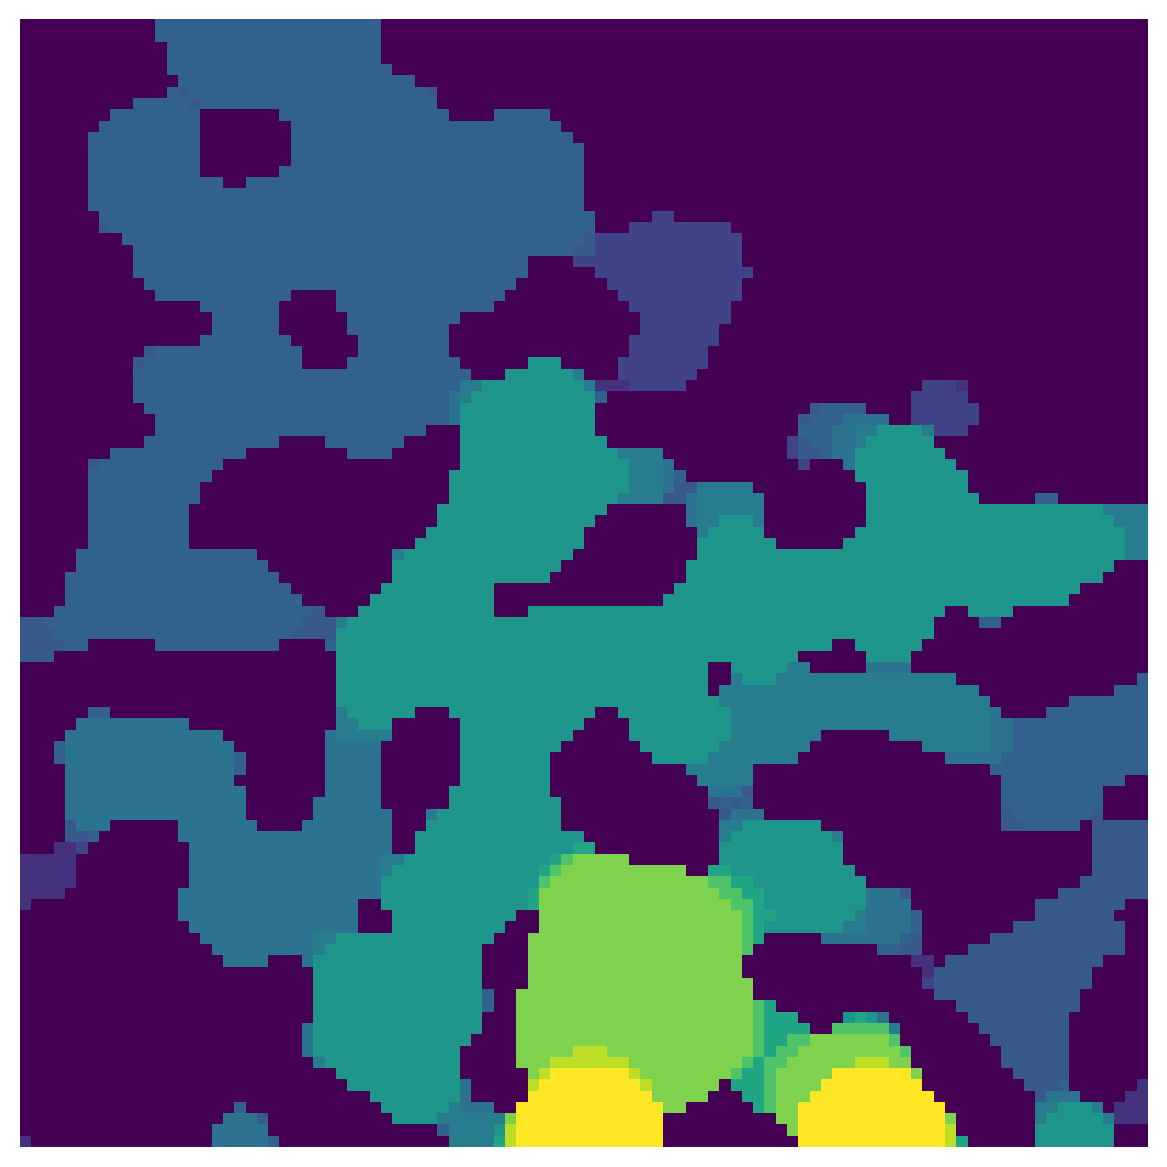

In [4]:
im = ps.generators.blobs(shape=[100, 100], porosity=0.6, seed=7)
inlets = np.zeros_like(im)
inlets[0, :] = True
sizes = ps.filters.porosimetry(im, inlets=inlets)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(sizes, interpolation='none', origin='lower')
ax.axis(False);

## `seq`
Given the sequence at which each voxel was invaded, this finds all voxels that were invaded after they were cutoff from the outlet.  The output of ``porosimetry`` however is in the reverse order, since the largest sizes are invaded first.  PoreSpy has a function for this, called ``size_to_seq``:

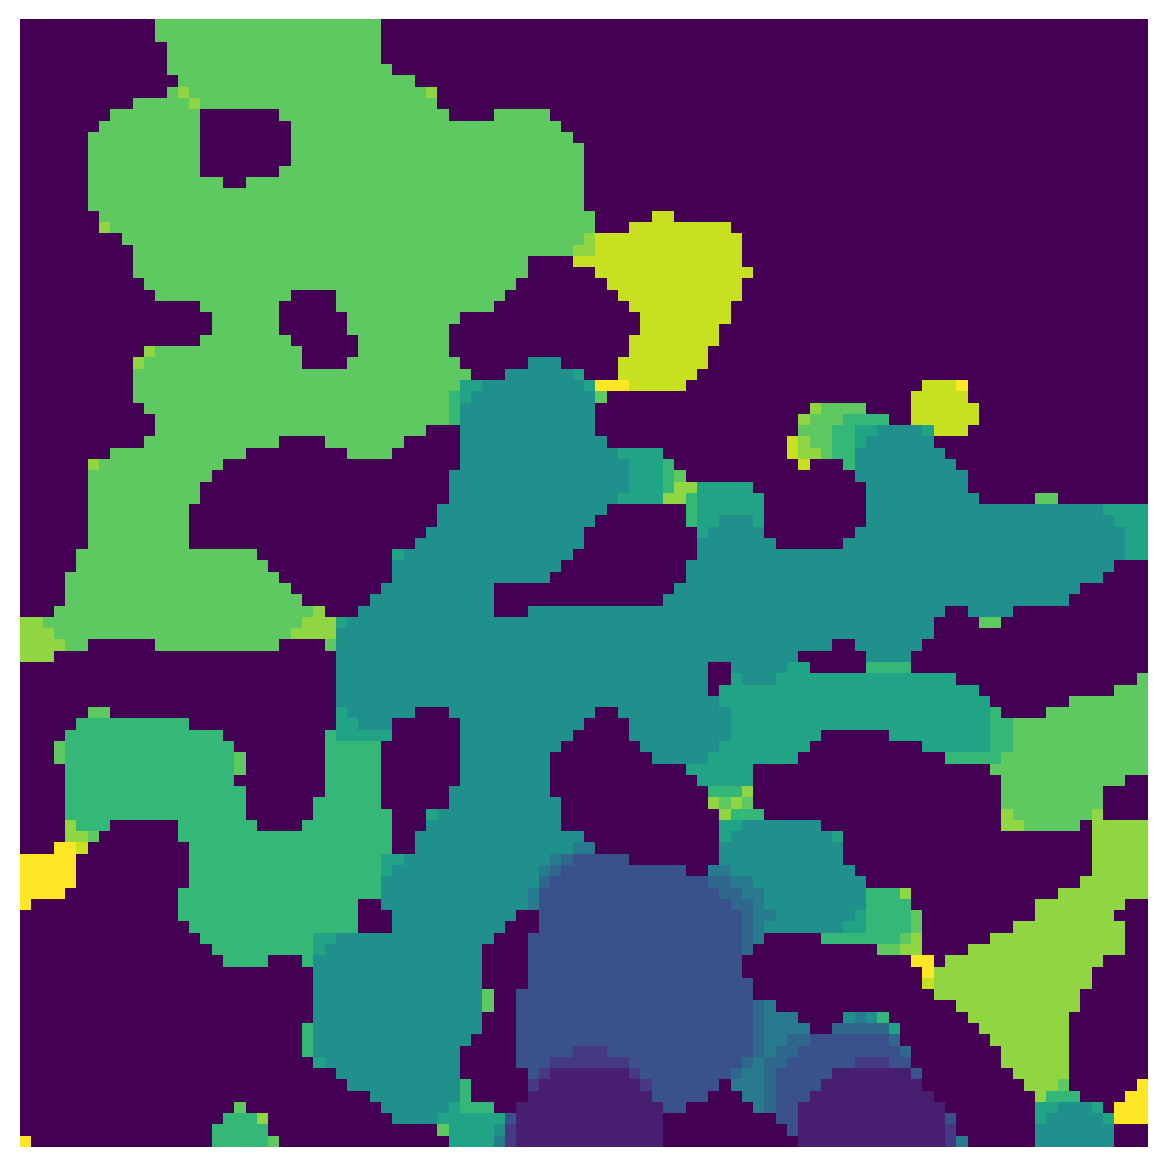

In [5]:
seq = ps.filters.size_to_seq(sizes)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(seq, interpolation='none', origin='lower')
ax.axis(False);

Now we can pass this result into ``find_trapped_regions``:

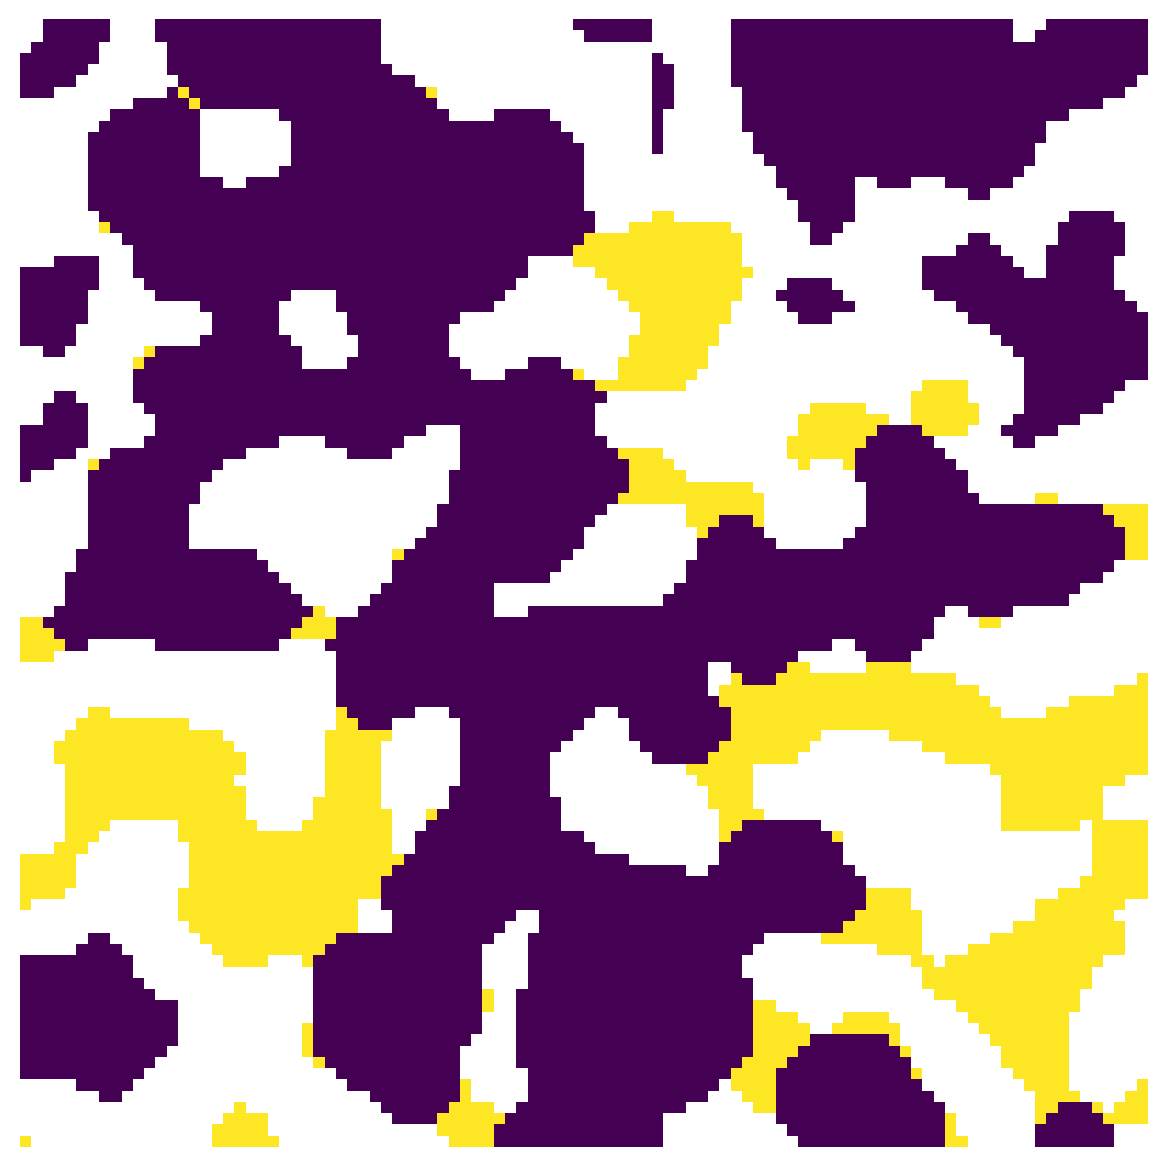

In [6]:
outlets = np.zeros_like(im)
outlets[-1, :] = True
trapped = ps.filters.find_trapped_regions(im=im, seq=seq, outlets=outlets)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(trapped/im, interpolation='none', origin='lower')
ax.axis(False);

In the above image the trapped regions are indicated by ``True``, so this can be used as a mask to remove invading voxels from the invasion image.

## `outlets`
It's possible to specify the which voxels are treated as the outlets.  If the outlets were on the right we'd see the following:

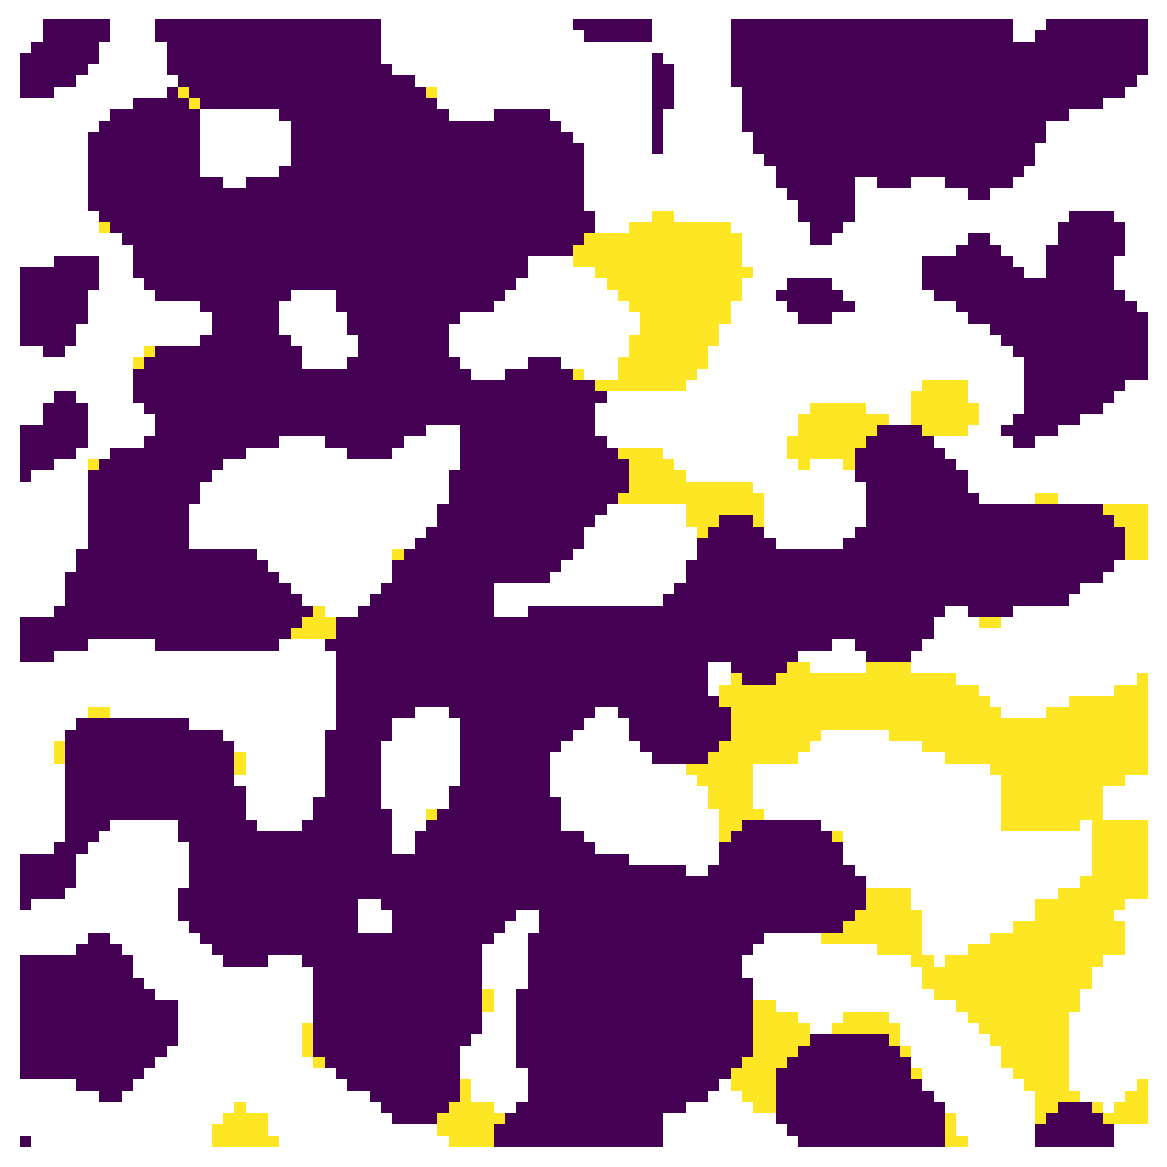

In [7]:
outlets = np.zeros_like(im)
outlets[:, 0] = True
trapped = ps.filters.find_trapped_regions(im=im, seq=seq, outlets=outlets)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(trapped/im, interpolation='none', origin='lower')
ax.axis(False);

## `return_mask`

By default the function will return as boolean mask with trapped regions indicated as `True`. However, if this is set to `False`, then `seq` is returned with trapped voxels set to `-1` and the other sequence values updated accordingly.

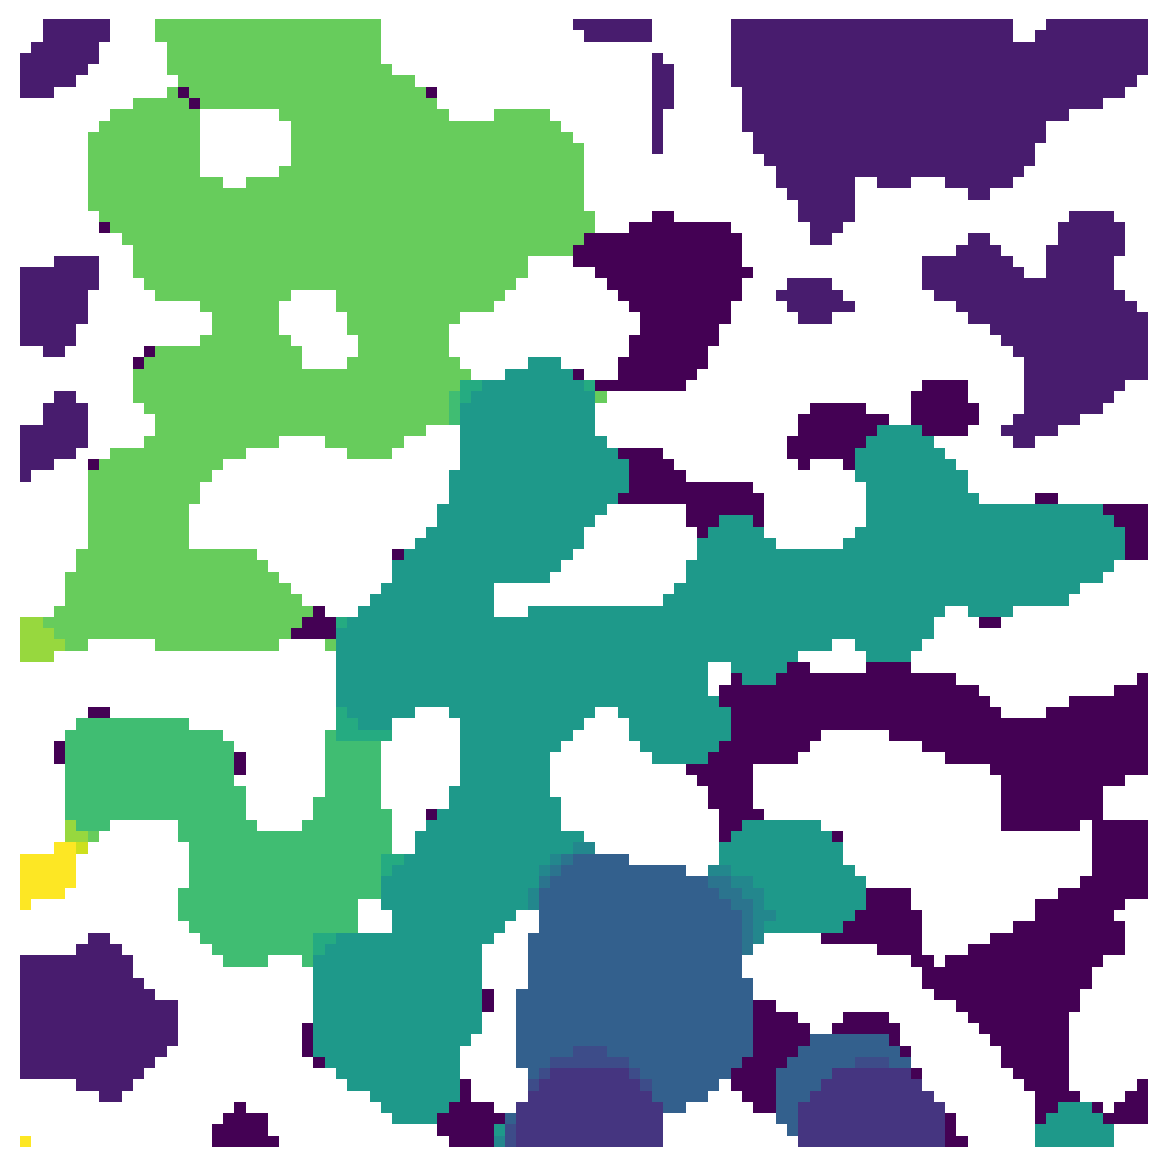

In [8]:
seq2 = ps.filters.find_trapped_regions(im=im, seq=seq, outlets=outlets, return_mask=False)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(seq2/im, interpolation='none', origin='lower')
ax.axis(False);

## `method`

There are two options for this argument: `'cluster'` and `'queue'`.  The former is best used for invasion sequences which were produced via `ibop` algorithms, while the latter is necessary for output from `ibip` or `qbip`.  

Exiting after 476 steps


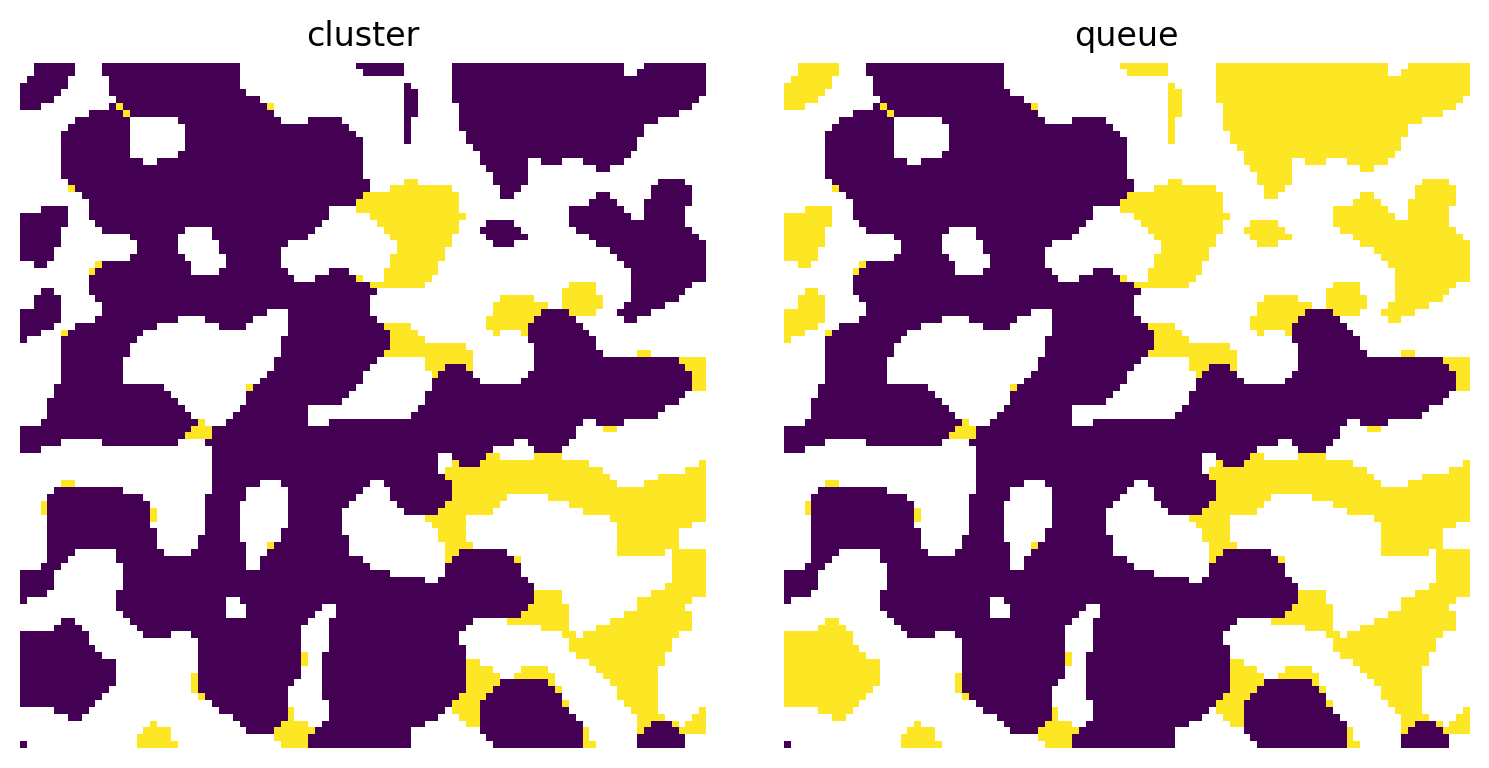

In [9]:
trapped1 = ps.filters.find_trapped_regions(im=im, seq=seq, outlets=outlets, method='cluster')
trapped2 = ps.filters.find_trapped_regions(im=im, seq=seq, outlets=outlets, method='queue')
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(trapped1/im, interpolation='none', origin='lower')
ax[0].axis(False)
ax[0].set_title('cluster')
ax[1].imshow(trapped2/im, interpolation='none', origin='lower')
ax[1].axis(False)
ax[1].set_title('queue');

## `min_size`

Due to the digitized nature of the voxel images, there are occasionally/often artifacts. In the case of trapped defending phase this appears as single or small clusters of voxels along the solid walls which lost connectivity during invasion so are technically "trapped", but in reality these would be able to escape. It is possible to exclude these small voxels be setting the `min_size` for clusters of voxels, below which they would not be trapped.

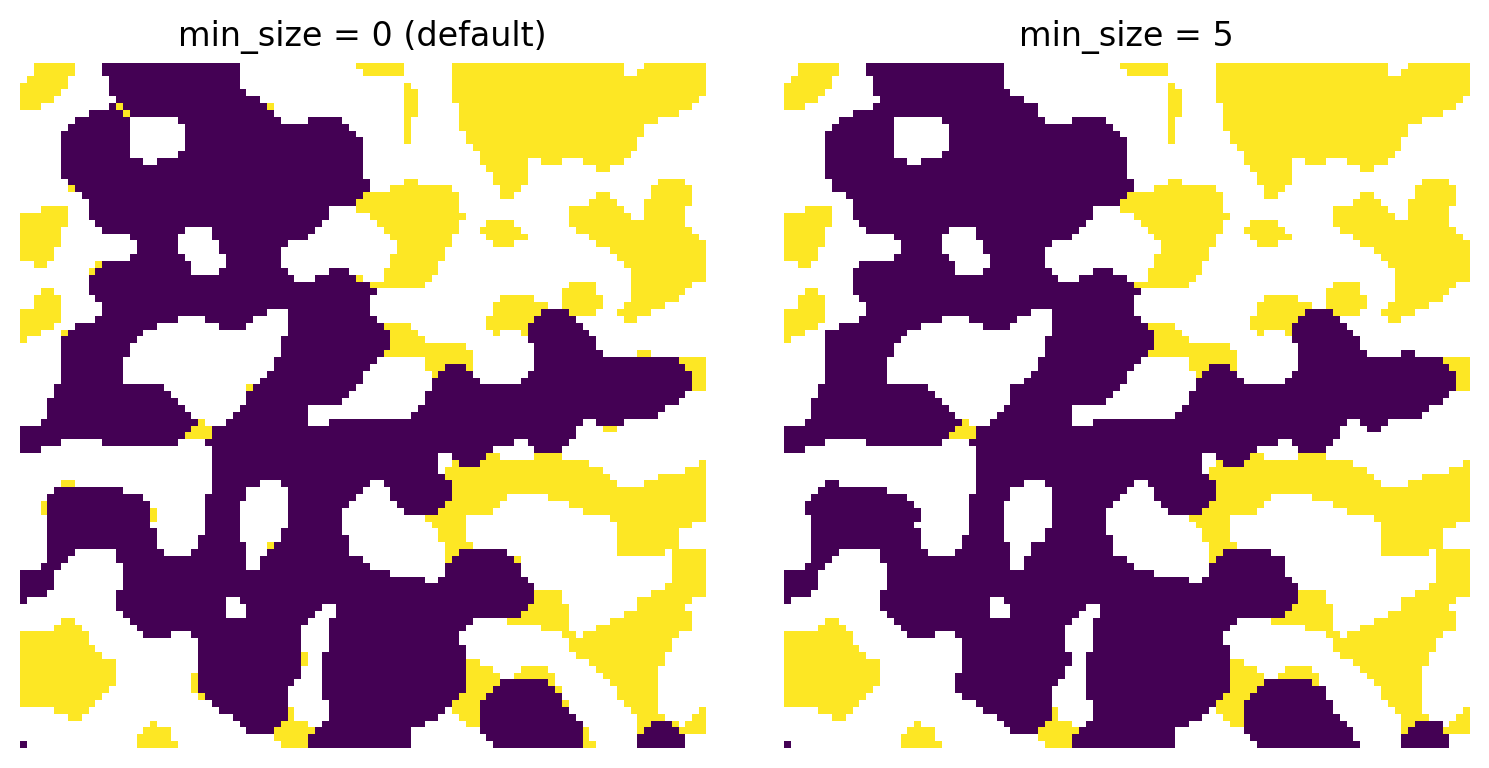

In [10]:
trapped1 = ps.filters.find_trapped_regions(im=im, seq=seq, outlets=outlets, min_size=0)
trapped2 = ps.filters.find_trapped_regions(im=im, seq=seq, outlets=outlets, min_size=5)
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(trapped1/im, interpolation='none', origin='lower')
ax[0].axis(False)
ax[0].set_title('min_size = 0 (default)')
ax[1].imshow(trapped2/im, interpolation='none', origin='lower')
ax[1].axis(False)
ax[1].set_title('min_size = 5');